<a href="https://colab.research.google.com/github/cavs1010/insuranceModel/blob/main/InsuranceModel_tensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚑Insurance model

## Imports

In [ ]:
# Import the required libraries
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import seaborn as sns
import math

# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

## 🛀Preprocessing
Preprocessing steps:
1. One hot encoding.
2. Normalization.
3. Train and test set split

In [ ]:
# Let's see the dataframe
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Variable types
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Create a column Transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # Scale these numerical values
    (OneHotEncoder(handle_unknown='ignore'),['sex', 'smoker', 'region'])
)

# Create X and y values
X = insurance.drop('charges', axis =1)
y = insurance['charges']

#  Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test set
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

## Model Training
Different models will be proposed:
* `model_1` -  basic neural network.
* `model_2` - change number of neurons
* `model_3` - change the optimizer of `model_1`
* `model_4` - Add epochs to the `model_1`
* `model_5` - Add a hidden layer and change the optimizer of `model_1`
* `model_6` - Increase epochs of `model_5`
* `model_7` - Increase epochs of `model_6`

### Model 1

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_1 = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)                                 
])

# 2. Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
history_1 = insurance_model_1.fit(X_train_normal, y_train, epochs=100, verbose = 0)

In [ ]:
# Evaluate the large model
mae_model_1 = insurance_model_1.evaluate(X_test_normal, y_test)[1]
mae_model_1

9/9 [==============================] - 0s 2ms/step - loss: 3170.0486 - mae: 3170.0486


3170.048583984375

### Model 2

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(10),                              
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
history_2 = insurance_model_2.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_2 = insurance_model_2.evaluate(X_test_normal, y_test)[1]
mae_model_2

9/9 [==============================] - 0s 2ms/step - loss: 3450.4182 - mae: 3450.4182


3450.418212890625

### Model 3

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1),                              
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit the model
history_3 = insurance_model_3.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_3 = insurance_model_3.evaluate(X_test_normal, y_test)[1]
mae_model_3

9/9 [==============================] - 0s 2ms/step - loss: 11767.6777 - mae: 11767.6777


11767.677734375

### Model 4

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1),                              
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
history_4 = insurance_model_4.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_4 = insurance_model_4.evaluate(X_test_normal, y_test)[1]
mae_model_4

9/9 [==============================] - 0s 2ms/step - loss: 3161.6204 - mae: 3161.6204


3161.620361328125

### Model 5

In [ ]:
# set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history_5 = insurance_model_5.fit(X_train_normal,y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_5 = insurance_model_5.evaluate(X_test_normal, y_test)[1]
mae_model_5

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


3438.784423828125

### Model 6

In [ ]:
# set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_6.compile(loss=tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history_6 = insurance_model_6.fit(X_train_normal,y_train, epochs=200, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_6 = insurance_model_6.evaluate(X_test_normal, y_test)[1]
mae_model_6

9/9 [==============================] - 0s 2ms/step - loss: 3171.5774 - mae: 3171.5774


3171.577392578125

### Model 7

In [ ]:
# set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_7.compile(loss=tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history_7 = insurance_model_7.fit(X_train_normal,y_train, epochs=300, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_7 = insurance_model_7.evaluate(X_test_normal, y_test)[1]
mae_model_7

9/9 [==============================] - 0s 2ms/step - loss: 3161.5601 - mae: 3161.5601


3161.56005859375

## Model Evaluation

In [ ]:
model_results = [['model_1', mae_model_1],
                 ['model_2', mae_model_2],
                 ['model_3', mae_model_3],
                 ['model_4', mae_model_4],
                 ['model_5', mae_model_5],
                 ['model_6', mae_model_6],
                 ['model_7', mae_model_7]]
model_results = pd.DataFrame(model_results,columns=['model','MAE'])

In [ ]:
model_results

,model,MAE
0,model_1,3170.048584
1,model_2,3450.418213
2,model_3,11767.677734
3,model_4,3161.620361
4,model_5,3438.784424
5,model_6,3171.577393
6,model_7,3161.560059


In [ ]:
model_results = model_results.sort_values('MAE')

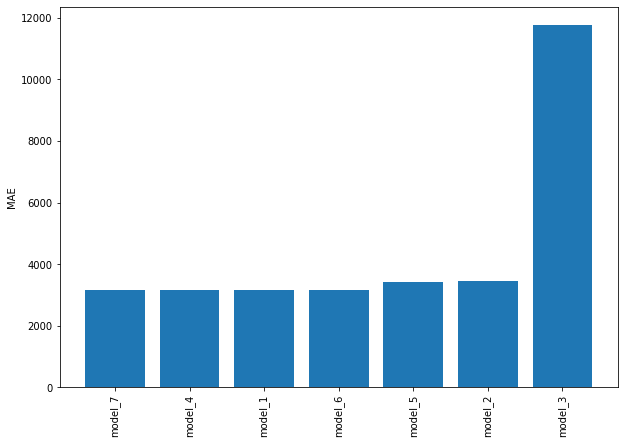

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(model_results['model'], model_results['MAE'])
ax.set_xticklabels(model_results['model'], rotation=90)
ax.set_ylabel('MAE')
plt.show()

# 🛠 Other Exercices
> 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.


In [ ]:
# Create X, y sould reflect the gaussian distribution
X = np.arange(1, 10, 0.02)
s = 1
a = 1/(s*((2*3.14)**(1/2)))
m = 5
y = a*(np.exp(((-0.5)*((X-m)**2))/(s**2)))

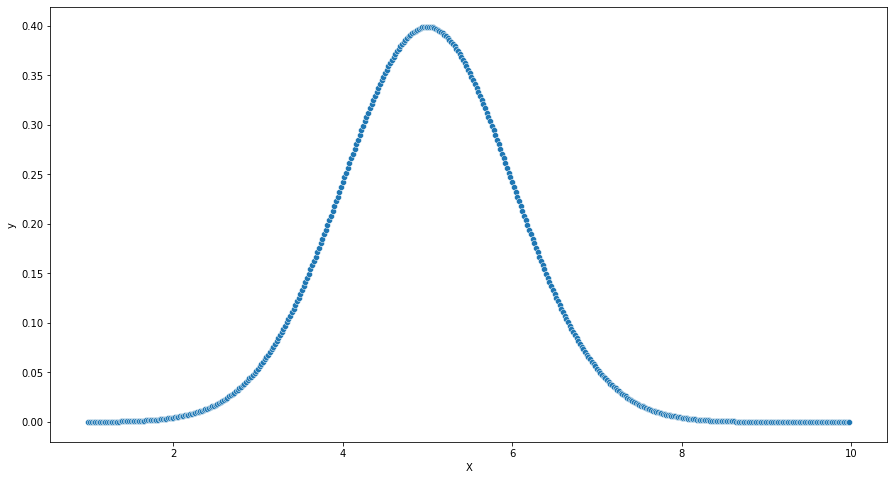

In [ ]:
# Visualize x vs y
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=X, y = y)
ax.set_xlabel('X')
ax.set_ylabel('y');

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

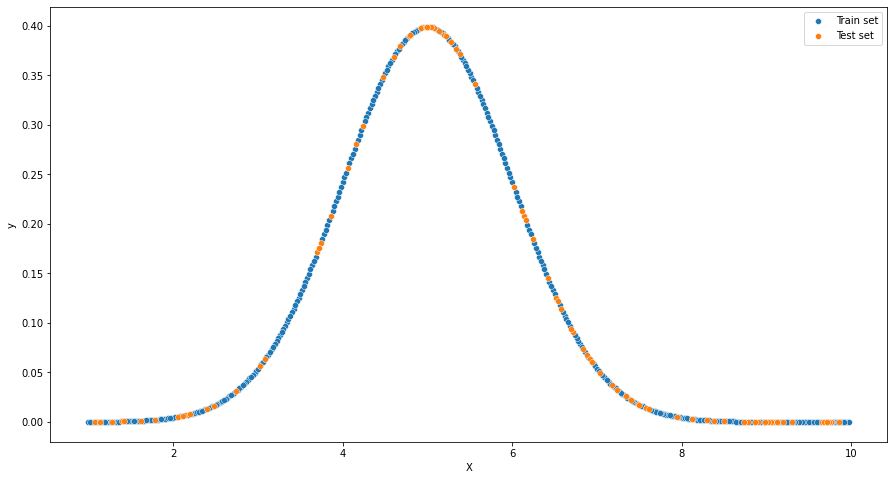

In [ ]:
# Lets Visualize with the model
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=X_train, y = y_train, ax = ax, label='Train set',)
sns.scatterplot(x=X_test, y = y_test, ax = ax , label='Test set')
ax.set_xlabel('X')
ax.set_ylabel('y');

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_1 = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)                                 
])

# 2. Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
history_1 = insurance_model_1.fit(X_train, y_train, epochs=100, verbose = 0)

In [ ]:
insurance_model_1.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.1598 - mae: 0.1598


[0.15980161726474762, 0.15980161726474762]